In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
data = pd.read_csv('smart_home_energy_consumption_large.csv')
data.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [ ]:
dateTime = data['Date'] + ' ' + data['Time']
data['Datetime'] = pd.to_datetime(dateTime)
data = data.drop(columns=['Date', 'Time'])
data = data.sort_values('Datetime')

In [ ]:
data.columns = data.columns.str.strip().str.replace('Â', '')
data.rename(columns={
    'Energy Consumption (kWh)': 'Energy_kWh',
    'Outdoor Temperature (°C)': 'Temperature_C'
}, inplace=True)

In [ ]:
data.head()

,Home ID,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime
51495,140,Lights,1.00,-5.9,Winter,1,2023-01-01 00:07:00
26489,298,Lights,1.09,22.0,Winter,1,2023-01-01 00:13:00
8690,469,Fridge,0.30,-1.2,Winter,3,2023-01-01 00:24:00
33315,398,Fridge,0.50,35.8,Winter,2,2023-01-01 00:26:00
93438,293,Washing Machine,1.12,2.7,Winter,3,2023-01-01 00:30:00


In [ ]:

data

,Home ID,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime
51495,140,Lights,1.00,-5.9,Winter,1,2023-01-01 00:07:00
26489,298,Lights,1.09,22.0,Winter,1,2023-01-01 00:13:00
8690,469,Fridge,0.30,-1.2,Winter,3,2023-01-01 00:24:00
33315,398,Fridge,0.50,35.8,Winter,2,2023-01-01 00:26:00
93438,293,Washing Machine,1.12,2.7,Winter,3,2023-01-01 00:30:00
...,...,...,...,...,...,...,...
46358,498,Microwave,1.70,8.0,Winter,3,2024-01-01 23:29:00
69600,433,Computer,0.43,-4.9,Winter,5,2024-01-01 23:48:00
92666,402,Dishwasher,0.54,32.9,Winter,5,2024-01-01 23:48:00
22537,111,Microwave,0.50,13.2,Winter,5,2024-01-01 23:50:00


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 51495 to 85260
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Home ID         100000 non-null  int64         
 1   Appliance Type  100000 non-null  object        
 2   Energy_kWh      100000 non-null  float64       
 3   Temperature_C   100000 non-null  float64       
 4   Season          100000 non-null  object        
 5   Household Size  100000 non-null  int64         
 6   Datetime        100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 6.1+ MB
None


In [ ]:
print(data.describe())

             Home ID     Energy_kWh  Temperature_C  Household Size  \
count  100000.000000  100000.000000  100000.000000   100000.000000   
mean      250.374980       1.499952      14.950135        3.001770   
min         1.000000       0.100000     -10.000000        1.000000   
25%       125.000000       0.590000       2.400000        2.000000   
50%       250.000000       1.230000      14.900000        3.000000   
75%       375.000000       1.870000      27.400000        4.000000   
max       500.000000       5.000000      40.000000        5.000000   
std       144.435367       1.181176      14.438755        1.417077   

                            Datetime  
count                         100000  
mean   2023-07-02 12:17:39.069599488  
min              2023-01-01 00:07:00  
25%              2023-04-02 10:04:45  
50%              2023-07-01 23:35:00  
75%              2023-10-02 03:56:00  
max              2024-01-01 23:53:00  
std                              NaN  


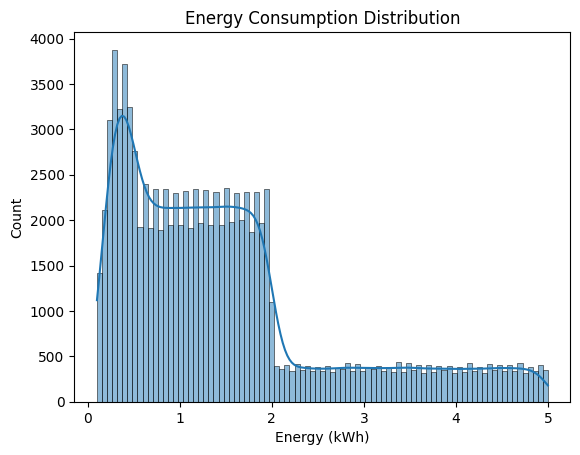

In [ ]:
sns.histplot(data['Energy_kWh'], kde=True)
plt.title("Energy Consumption Distribution")
plt.xlabel("Energy (kWh)")
plt.show()

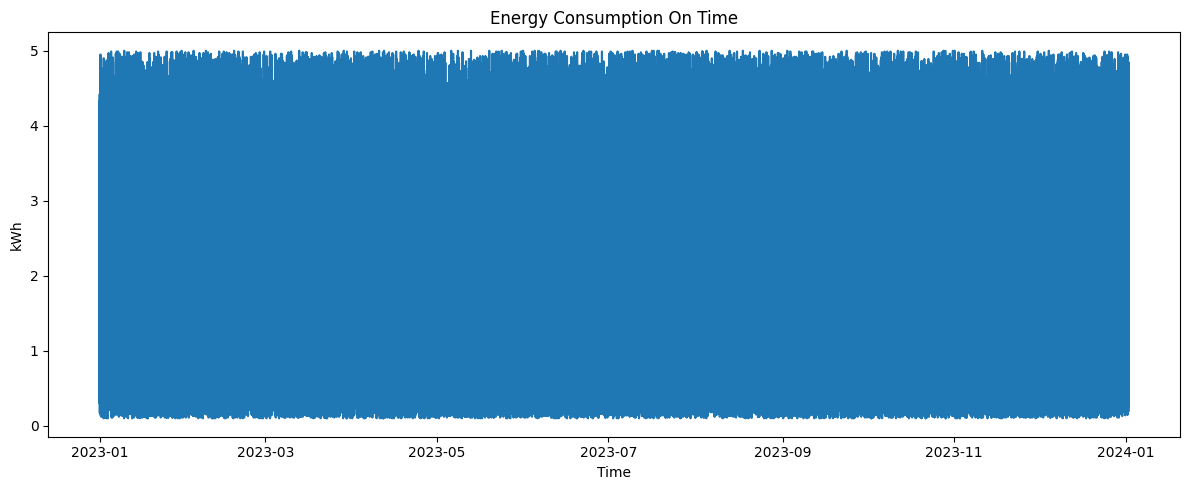

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['Datetime'], data['Energy_kWh'])
plt.title("Energy Consumption On Time")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.tight_layout()
plt.show()

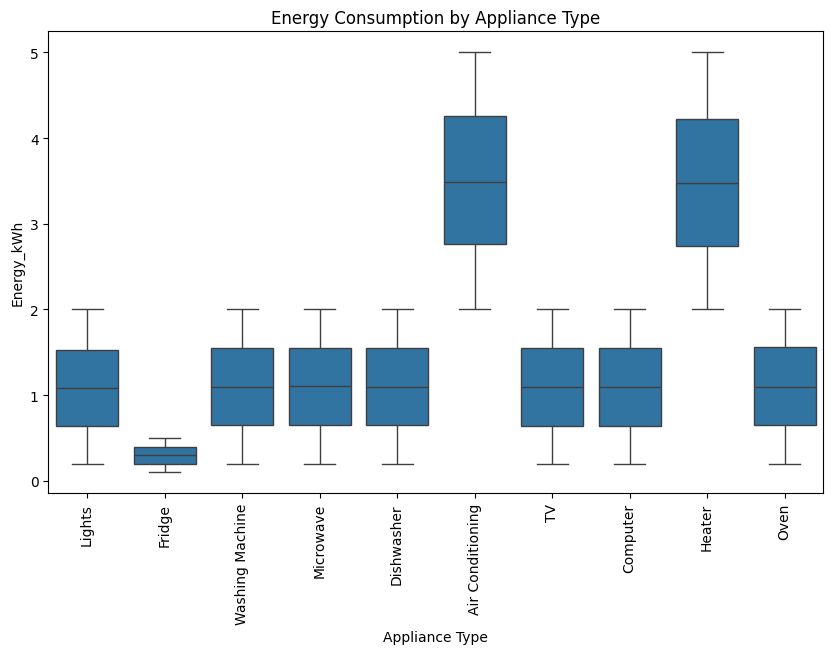

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Appliance Type', y='Energy_kWh')
plt.title("Energy Consumption by Appliance Type")
plt.xticks(rotation=90)
plt.show()

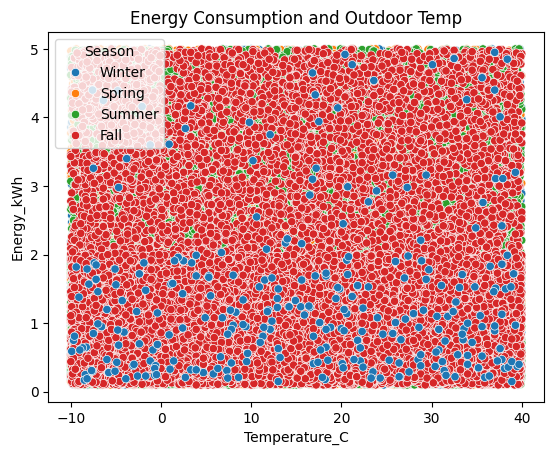

In [ ]:
sns.scatterplot(data=data, x='Temperature_C', y='Energy_kWh', hue='Season')
plt.title("Energy Consumption and Outdoor Temp")
plt.show()


In [ ]:
# TASK - 02

In [ ]:
# 2. handling missing values
print(data.isnull().sum())

Home ID           0
Appliance Type    0
Energy_kWh        0
Temperature_C     0
Season            0
Household Size    0
Datetime          0
dtype: int64


In [ ]:
# droping missing values we dont have but still
data = data.dropna()

In [ ]:
data = data.drop(columns=['Home ID'])

In [ ]:
data

,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime
51495,Lights,1.00,-5.9,Winter,1,2023-01-01 00:07:00
26489,Lights,1.09,22.0,Winter,1,2023-01-01 00:13:00
8690,Fridge,0.30,-1.2,Winter,3,2023-01-01 00:24:00
33315,Fridge,0.50,35.8,Winter,2,2023-01-01 00:26:00
93438,Washing Machine,1.12,2.7,Winter,3,2023-01-01 00:30:00
...,...,...,...,...,...,...
46358,Microwave,1.70,8.0,Winter,3,2024-01-01 23:29:00
69600,Computer,0.43,-4.9,Winter,5,2024-01-01 23:48:00
92666,Dishwasher,0.54,32.9,Winter,5,2024-01-01 23:48:00
22537,Microwave,0.50,13.2,Winter,5,2024-01-01 23:50:00


In [ ]:
#Task 2 / (1.2) : Outliers

In [ ]:
def findOutliers (data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    Outlier = []
    for x in data[col]:
      if x < LB or x > UB:
        Outlier.append(x)
    return Outlier

In [ ]:
findOutliers(data, 'Energy_kWh')

[4.42,
 4.37,
 4.22,
 4.34,
 4.12,
 4.19,
 3.87,
 4.0,
 4.48,
 4.12,
 4.36,
 3.95,
 4.45,
 4.95,
 4.45,
 4.13,
 4.59,
 4.03,
 4.47,
 3.98,
 4.53,
 4.36,
 4.42,
 4.04,
 3.91,
 4.64,
 4.41,
 4.76,
 3.86,
 4.41,
 4.74,
 4.37,
 4.19,
 3.98,
 4.04,
 4.61,
 3.93,
 4.9,
 4.65,
 4.58,
 3.84,
 4.12,
 4.03,
 4.84,
 4.01,
 4.4,
 4.1,
 3.94,
 4.59,
 4.29,
 4.28,
 4.23,
 4.83,
 4.01,
 4.24,
 4.77,
 4.69,
 4.04,
 4.78,
 4.28,
 4.55,
 4.87,
 3.85,
 4.31,
 4.18,
 3.98,
 4.77,
 3.8,
 4.87,
 4.5,
 3.87,
 3.87,
 4.66,
 4.21,
 4.95,
 4.58,
 4.77,
 4.8,
 4.97,
 4.56,
 3.99,
 4.25,
 3.81,
 4.18,
 4.28,
 3.95,
 4.63,
 3.89,
 4.43,
 4.33,
 4.27,
 4.9,
 4.15,
 4.15,
 4.42,
 4.77,
 3.88,
 4.25,
 4.94,
 4.8,
 4.56,
 4.64,
 4.92,
 4.15,
 4.99,
 4.02,
 4.76,
 4.24,
 4.44,
 4.19,
 4.57,
 4.21,
 4.49,
 4.54,
 3.96,
 4.4,
 4.84,
 4.61,
 4.15,
 3.89,
 4.91,
 3.95,
 3.82,
 3.86,
 4.66,
 3.93,
 4.22,
 4.61,
 3.9,
 3.82,
 3.92,
 3.81,
 4.27,
 4.13,
 4.29,
 4.51,
 4.3,
 4.44,
 3.97,
 3.87,
 4.65,
 4.07,
 4.32,
 4.47,
 4.6

In [ ]:
print("Outlier in Data: ",len(findOutliers(data,'Energy_kWh')))
print("Percentage: " , round((len(findOutliers(data, 'Energy_kWh'))/len(data))*100,2) , "%")

Outlier in Data:  7997
Percentage:  8.0 %


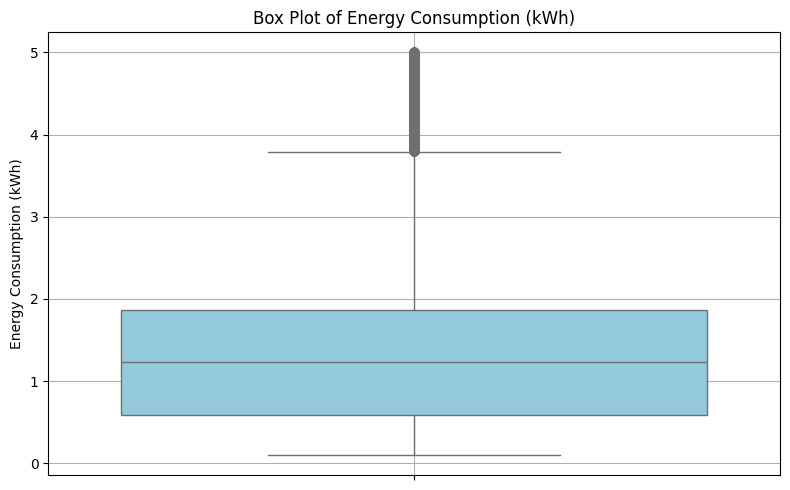

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Energy_kWh', color='skyblue')

plt.title('Box Plot of Energy Consumption (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Task 2 / (2): Creating Time based Features

In [ ]:
# Checking datetime is datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extracting the time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Weekday'] = data['Datetime'].dt.dayofweek # [0=>Monday,...,6=>Sunday]
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year


In [ ]:
data

,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime,Hour,Day,Weekday,Month,Year
51495,Lights,1.00,-5.9,Winter,1,2023-01-01 00:07:00,0,1,6,1,2023
26489,Lights,1.09,22.0,Winter,1,2023-01-01 00:13:00,0,1,6,1,2023
8690,Fridge,0.30,-1.2,Winter,3,2023-01-01 00:24:00,0,1,6,1,2023
33315,Fridge,0.50,35.8,Winter,2,2023-01-01 00:26:00,0,1,6,1,2023
93438,Washing Machine,1.12,2.7,Winter,3,2023-01-01 00:30:00,0,1,6,1,2023
...,...,...,...,...,...,...,...,...,...,...,...
46358,Microwave,1.70,8.0,Winter,3,2024-01-01 23:29:00,23,1,0,1,2024
69600,Computer,0.43,-4.9,Winter,5,2024-01-01 23:48:00,23,1,0,1,2024
92666,Dishwasher,0.54,32.9,Winter,5,2024-01-01 23:48:00,23,1,0,1,2024
22537,Microwave,0.50,13.2,Winter,5,2024-01-01 23:50:00,23,1,0,1,2024


In [ ]:
data.head()

,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime,Hour,Day,Weekday,Month,Year
51495,Lights,1.00,-5.9,Winter,1,2023-01-01 00:07:00,0,1,6,1,2023
26489,Lights,1.09,22.0,Winter,1,2023-01-01 00:13:00,0,1,6,1,2023
8690,Fridge,0.30,-1.2,Winter,3,2023-01-01 00:24:00,0,1,6,1,2023
33315,Fridge,0.50,35.8,Winter,2,2023-01-01 00:26:00,0,1,6,1,2023
93438,Washing Machine,1.12,2.7,Winter,3,2023-01-01 00:30:00,0,1,6,1,2023


In [ ]:
# Task # 02 / (3): Correlation

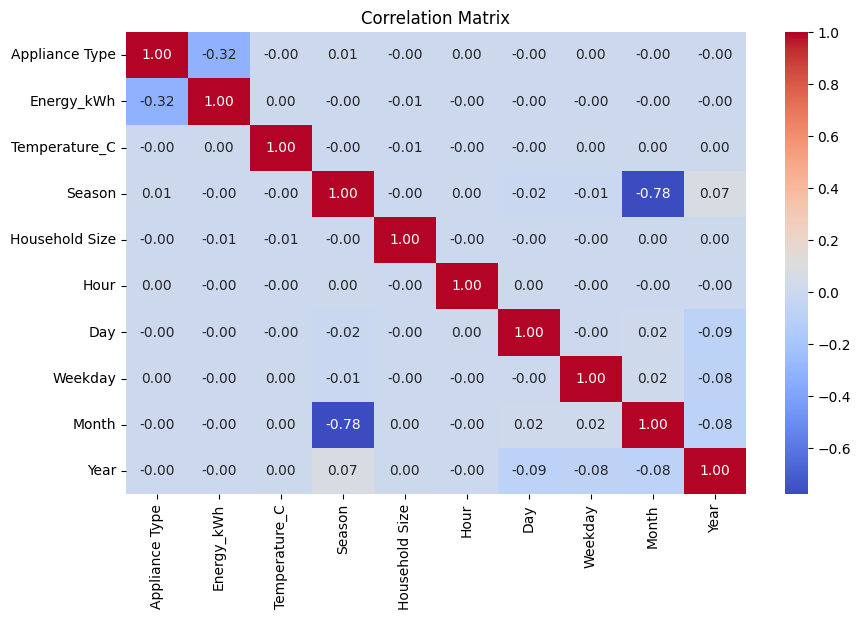

In [ ]:
# Encode categorical variables for correlation heatmap
corrData = data.copy()
corrData['Season'] = corrData['Season'].astype('category').cat.codes
corrData['Appliance Type'] = corrData['Appliance Type'].astype('category').cat.codes

corrData['Season']

# Correlation matrix
corrMatrix = corrData.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
scaleFeatures = ['Temperature_C', 'Household Size', 'Hour', 'Weekday', 'Month', 'Energy_kWh']
scaler = StandardScaler()
data[scaleFeatures] = scaler.fit_transform(data[scaleFeatures])

In [ ]:
data.head()

,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime,Hour,Day,Weekday,Month,Year
51495,Lights,-0.423268,-1.444047,Winter,-1.412612,2023-01-01 00:07:00,-1.658521,1,1.489187,-1.592781,2023
26489,Lights,-0.347072,0.488262,Winter,-1.412612,2023-01-01 00:13:00,-1.658521,1,1.489187,-1.592781,2023
8690,Fridge,-1.015901,-1.118532,Winter,-0.001249,2023-01-01 00:24:00,-1.658521,1,1.489187,-1.592781,2023
33315,Fridge,-0.846577,1.444028,Winter,-0.706931,2023-01-01 00:26:00,-1.658521,1,1.489187,-1.592781,2023
93438,Washing Machine,-0.321674,-0.848425,Winter,-0.001249,2023-01-01 00:30:00,-1.658521,1,1.489187,-1.592781,2023


In [ ]:
#TASK 3

In [ ]:
encodedData = data.copy()

# # One-hot encoding for 'Appliance Type' and 'Season'
encodedData = pd.get_dummies(encodedData, columns=['Appliance Type', 'Season'], drop_first=True)

In [ ]:
# https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression

In [ ]:
encodedData

,Energy_kWh,Temperature_C,Household Size,Datetime,Hour,Day,Weekday,Month,Year,Appliance Type_Computer,...,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
51495,-0.423268,-1.444047,-1.412612,2023-01-01 00:07:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,True,False,False,False,False,False,False,True
26489,-0.347072,0.488262,-1.412612,2023-01-01 00:13:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,True,False,False,False,False,False,False,True
8690,-1.015901,-1.118532,-0.001249,2023-01-01 00:24:00,-1.658521,1,1.489187,-1.592781,2023,False,...,True,False,False,False,False,False,False,False,False,True
33315,-0.846577,1.444028,-0.706931,2023-01-01 00:26:00,-1.658521,1,1.489187,-1.592781,2023,False,...,True,False,False,False,False,False,False,False,False,True
93438,-0.321674,-0.848425,-0.001249,2023-01-01 00:30:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46358,0.169365,-0.481355,-0.001249,2024-01-01 23:29:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,True,False,False,False,False,False,True
69600,-0.905841,-1.374788,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024,True,...,False,False,False,False,False,False,False,False,False,True
92666,-0.812713,1.243179,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,False,False,False,False,False,False,True
22537,-0.846577,-0.121212,1.410114,2024-01-01 23:50:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
target = 'Energy_kWh'
features = []
for col in encodedData.columns:
  if col != 'Energy_kWh' and col != 'Datetime':
    features.append(col)

X = encodedData[features]
y = encodedData[target]


In [ ]:
y

,Energy_kWh
51495,-0.423268
26489,-0.347072
8690,-1.015901
33315,-0.846577
93438,-0.321674
...,...
46358,0.169365
69600,-0.905841
92666,-0.812713
22537,-0.846577


In [ ]:
data

,Appliance Type,Energy_kWh,Temperature_C,Season,Household Size,Datetime,Hour,Day,Weekday,Month,Year
51495,Lights,-0.423268,-1.444047,Winter,-1.412612,2023-01-01 00:07:00,-1.658521,1,1.489187,-1.592781,2023
26489,Lights,-0.347072,0.488262,Winter,-1.412612,2023-01-01 00:13:00,-1.658521,1,1.489187,-1.592781,2023
8690,Fridge,-1.015901,-1.118532,Winter,-0.001249,2023-01-01 00:24:00,-1.658521,1,1.489187,-1.592781,2023
33315,Fridge,-0.846577,1.444028,Winter,-0.706931,2023-01-01 00:26:00,-1.658521,1,1.489187,-1.592781,2023
93438,Washing Machine,-0.321674,-0.848425,Winter,-0.001249,2023-01-01 00:30:00,-1.658521,1,1.489187,-1.592781,2023
...,...,...,...,...,...,...,...,...,...,...,...
46358,Microwave,0.169365,-0.481355,Winter,-0.001249,2024-01-01 23:29:00,1.662431,1,-1.499118,-1.592781,2024
69600,Computer,-0.905841,-1.374788,Winter,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024
92666,Dishwasher,-0.812713,1.243179,Winter,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024
22537,Microwave,-0.846577,-0.121212,Winter,1.410114,2024-01-01 23:50:00,1.662431,1,-1.499118,-1.592781,2024


In [ ]:
encodedData

,Energy_kWh,Temperature_C,Household Size,Datetime,Hour,Day,Weekday,Month,Year,Appliance Type_Computer,...,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
51495,-0.423268,-1.444047,-1.412612,2023-01-01 00:07:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,True,False,False,False,False,False,False,True
26489,-0.347072,0.488262,-1.412612,2023-01-01 00:13:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,True,False,False,False,False,False,False,True
8690,-1.015901,-1.118532,-0.001249,2023-01-01 00:24:00,-1.658521,1,1.489187,-1.592781,2023,False,...,True,False,False,False,False,False,False,False,False,True
33315,-0.846577,1.444028,-0.706931,2023-01-01 00:26:00,-1.658521,1,1.489187,-1.592781,2023,False,...,True,False,False,False,False,False,False,False,False,True
93438,-0.321674,-0.848425,-0.001249,2023-01-01 00:30:00,-1.658521,1,1.489187,-1.592781,2023,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46358,0.169365,-0.481355,-0.001249,2024-01-01 23:29:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,True,False,False,False,False,False,True
69600,-0.905841,-1.374788,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024,True,...,False,False,False,False,False,False,False,False,False,True
92666,-0.812713,1.243179,1.410114,2024-01-01 23:48:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,False,False,False,False,False,False,True
22537,-0.846577,-0.121212,1.410114,2024-01-01 23:50:00,1.662431,1,-1.499118,-1.592781,2024,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
X

,Temperature_C,Household Size,Hour,Day,Weekday,Month,Year,Appliance Type_Computer,Appliance Type_Dishwasher,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
51495,-1.444047,-1.412612,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,True,False,False,False,False,False,False,True
26489,0.488262,-1.412612,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,True,False,False,False,False,False,False,True
8690,-1.118532,-0.001249,-1.658521,1,1.489187,-1.592781,2023,False,False,True,False,False,False,False,False,False,False,False,True
33315,1.444028,-0.706931,-1.658521,1,1.489187,-1.592781,2023,False,False,True,False,False,False,False,False,False,False,False,True
93438,-0.848425,-0.001249,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46358,-0.481355,-0.001249,1.662431,1,-1.499118,-1.592781,2024,False,False,False,False,False,True,False,False,False,False,False,True
69600,-1.374788,1.410114,1.662431,1,-1.499118,-1.592781,2024,True,False,False,False,False,False,False,False,False,False,False,True
92666,1.243179,1.410114,1.662431,1,-1.499118,-1.592781,2024,False,True,False,False,False,False,False,False,False,False,False,True
22537,-0.121212,1.410114,1.662431,1,-1.499118,-1.592781,2024,False,False,False,False,False,True,False,False,False,False,False,True


In [ ]:
y

,Energy_kWh
51495,-0.423268
26489,-0.347072
8690,-1.015901
33315,-0.846577
93438,-0.321674
...,...
46358,0.169365
69600,-0.905841
92666,-0.812713
22537,-0.846577


In [ ]:
# split train / test part
from sklearn.model_selection import train_test_split

# Split 70% train, 15% validation, 15% test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


In [ ]:
X_train

,Temperature_C,Household Size,Hour,Day,Weekday,Month,Year,Appliance Type_Computer,Appliance Type_Dishwasher,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
51495,-1.444047,-1.412612,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,True,False,False,False,False,False,False,True
26489,0.488262,-1.412612,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,True,False,False,False,False,False,False,True
8690,-1.118532,-0.001249,-1.658521,1,1.489187,-1.592781,2023,False,False,True,False,False,False,False,False,False,False,False,True
33315,1.444028,-0.706931,-1.658521,1,1.489187,-1.592781,2023,False,False,True,False,False,False,False,False,False,False,False,True
93438,-0.848425,-0.001249,-1.658521,1,1.489187,-1.592781,2023,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40146,0.709889,1.410114,1.084874,13,-0.503016,0.726484,2023,False,False,False,False,False,False,False,False,False,False,True,False
88801,-0.550614,1.410114,1.084874,13,-0.503016,0.726484,2023,False,False,False,False,False,False,False,True,False,False,True,False
88738,-1.582564,-0.706931,1.084874,13,-0.503016,0.726484,2023,False,False,True,False,False,False,False,False,False,False,True,False
13186,-1.201642,-0.706931,1.084874,13,-0.503016,0.726484,2023,False,False,False,False,True,False,False,False,False,False,True,False


In [ ]:

from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
lrPred = lrModel.predict(X_test)
lrPredVal = lrModel.predict(X_val)


In [ ]:
print("LrPred: " ,lrPred)
print("LrPredVal: " ,lrPredVal)

LrPred:  [-0.35084133 -0.3550984  -1.02616323 ... -0.34257848 -0.34261083
 -0.34158418]
LrPredVal:  [-0.34633691 -0.34427001 -0.34697558 ... -1.03178958  1.67233154
  1.67312015]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=100, random_state=42)
rfModel.fit(X_train, y_train)
rfPreds = rfModel.predict(X_test)
rfPredsVal = rfModel.predict(X_val)

In [ ]:
print("RfPreds: " ,rfPreds)
print("RfPredsVal: " ,rfPredsVal)

RfPreds:  [-0.22236563 -0.36637539 -0.98821647 ... -0.29204231 -0.3568086
 -0.30762009]
RfPredsVal:  [-0.38745618 -0.29669871 -0.25978616 ... -1.02258917  1.70690797
  1.48136888]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluateModel(name, y_test, preds):
    print(f"{name} Evaluation")
    print("MAE :", mean_absolute_error(y_test, preds))
    print("MSE :", mean_squared_error(y_test, preds))
    print("R²  :", r2_score(y_test, preds))
    print()

evaluateModel("Linear Regression", y_test, lrPred)
evaluateModel("Random Forest", y_test, rfPreds)
evaluateModel("Linear Regression Validation", y_test, lrPredVal)
evaluateModel("Random Forest Validation", y_test, rfPredsVal)


Linear Regression Evaluation
MAE : 0.40218159232424733
MSE : 0.24362587010823414
R²  : 0.7526904744909235

Random Forest Evaluation
MAE : 0.4103924170940144
MSE : 0.25805510412854493
R²  : 0.7380430685424619

Linear Regression Validation Evaluation
MAE : 0.979260008096328
MSE : 1.7350069238661516
R²  : -0.7612404581897403

Random Forest Validation Evaluation
MAE : 0.983139526819396
MSE : 1.748346199337753
R²  : -0.7747814252719758



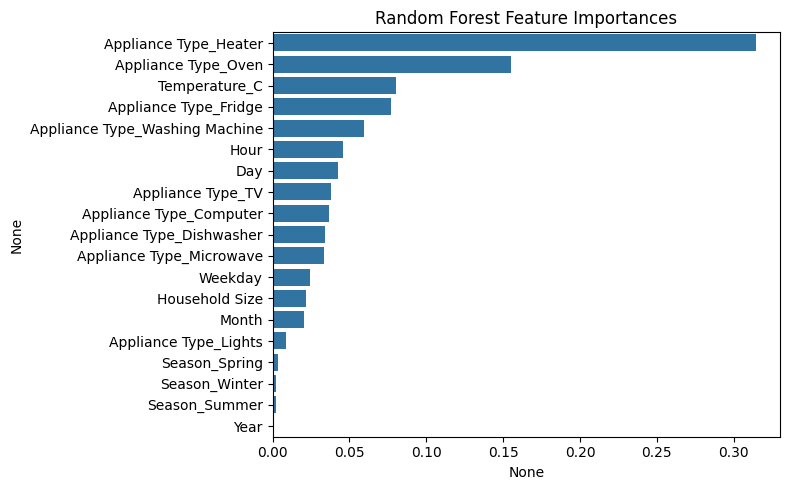

In [ ]:
importances = pd.Series(rfModel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()
